# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## 1. Подготовка данных

### Импортируем библиотеки

In [2]:
import pandas as pd
import numpy as np
import math

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import make_scorer

Отключим предупреждения

In [3]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

In [4]:
random_value = 2021

### Изучим данные

In [5]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [403]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [404]:
gold_recovery_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [405]:
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [406]:
gold_recovery_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [407]:
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [408]:
gold_recovery_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


Заметим, что в данных очень много пропусков.

### Проверка расчёта эффективности обогащения

Рассчитаем эффективность обогащения и сохраним её в колонке "rougher.output.check_recovery". Сверим данные со значением "rougher.output.recovery".

In [409]:
check_mae_data = gold_recovery_train[['rougher.output.recovery']]
check_mae_data['rougher.output.check_recovery'] = (gold_recovery_train['rougher.output.concentrate_au'] 
                                         * (gold_recovery_train['rougher.input.feed_au'] - gold_recovery_train['rougher.output.tail_au'])) / (gold_recovery_train['rougher.input.feed_au'] * (gold_recovery_train['rougher.output.concentrate_au'] - gold_recovery_train['rougher.output.tail_au']));

Посмотрим первые 10 значений. Но, т.к. некоторые значения не рассчитались - проверим без учета null-значений.

In [410]:

check_mae_data = check_mae_data[check_mae_data['rougher.output.check_recovery'].isnull() == False]
check_mae_data = check_mae_data[check_mae_data['rougher.output.recovery'].isnull() == False]
check_mae_data.head(10)

,rougher.output.recovery,rougher.output.check_recovery
0,87.107763,0.871078
1,86.843261,0.868433
2,86.842308,0.868423
3,87.226430,0.872264
4,86.688794,0.866888
5,88.156912,0.881569
6,88.168065,0.881681
7,87.668336,0.876683
8,87.035862,0.870359
9,87.650868,0.876509


In [411]:
check_mae_data[abs(check_mae_data['rougher.output.check_recovery'] - check_mae_data['rougher.output.recovery']) > 1]

,rougher.output.recovery,rougher.output.check_recovery
0,87.107763,0.871078
1,86.843261,0.868433
2,86.842308,0.868423
3,87.226430,0.872264
4,86.688794,0.866888
...,...,...
16855,89.574376,0.895744
16856,87.724007,0.877240
16857,88.890579,0.888906
16858,89.858126,0.898581


По первым 10 строкам - значения рассчитаны верно, но rougher.output.recovery Рассчитана в процентах.  Домножим rougher.output.check_recovery на 100 и вычислим MAE.

In [412]:
print(mean_absolute_error(check_mae_data['rougher.output.check_recovery'] * 100, check_mae_data['rougher.output.recovery']))    

9.444891926100695e-15


Получили значение МАЕ порядка 10 в -15 степени. Это ничтожно малое значение и получилось оно из-за разных порядков окруления.  
Из этого можем сделать вывод, что значение rougher.output.recovery в данных рассчитано корректно.

### Признаки, недоступные в тестовой выборке.

Сохраним наименования столбцов в отдельные переменные и в цикле найдем разность массивов.

In [413]:
cols_train = gold_recovery_train.columns
cols_test = gold_recovery_test.columns
cols_not_test = []

for item in cols_train:
    if not (item in cols_test):
        cols_not_test.append(item)

Выведем список столбцов, которые не попали в тестовую выборку.

In [414]:
cols_not_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Замечаем, что все эти параметры не могут быть использованы в качестве признаков для поступления на вход модели.
Все они описывают результаты того или иного процесса.
final.output - финальные характеристики
rougher.output - параметры после флотации
rougher.calculation - расчетные характеристики
primary_cleaner.output - параметры после первичной очистки
secondary_cleaner.output - параметры после вторичной очистки

Все эти колонки подходят в качестве целевого признака для прогнозирования, но не для features. 

###  Предобработка данных

Как мы заметили ранее - в данных (почти во всех колонках) есть пропуски. Их количество невелико, но, тем не менее, избавиться от них мы не можем. Поскольку все колонки (кроме date) нашего датасета - типа float, можем написать функцию перебора всех колонок в цикле и замену отсутствующих значений на медиану.

In [415]:
def fill_median(data):
    cols = data.columns
    for field in cols:
        if(field != 'date'):
            mediann = data[field].median()
            data[field] = data[field].fillna(mediann)

Заполним все отсуствующие значения во всех наших датасетах медианами.

In [416]:
def fill_prev_value(data):
    cols = data.columns
    for field in cols:
        if(field != 'date'):
            prev_value = data[field].median()
            for i in range(1, len(data[field])):
                if(math.isnan(data[field][i])):
                    data[field][i] = prev_value
                prev_value = data[field][i]

In [417]:
%%time
fill_prev_value(gold_recovery_train)
fill_prev_value(gold_recovery_test)
fill_prev_value(gold_recovery_full)

#fill_median(gold_recovery_train)
#fill_median(gold_recovery_test)
#fill_median(gold_recovery_full)

CPU times: user 242 ms, sys: 0 ns, total: 242 ms
Wall time: 260 ms


### Вывод:
На данном этапе были изучены исходные данные. Замечено присутствие пропусков почти во всех колонках наших таблиц. Их количество невелико, но, тем не менее, избавиться от них мы не можем. Поскольку все колонки (кроме date) нашего датасета - типа float - была написана функция перебора всех колонок в цикле и замена отсутствующих значений на медиану.

Была также проверена правильность расчета эффективности обогащения. При вычислении MAE рассчитанной и имеющейся выборок получили значение порядка 10 в -15 степени. Это ничтожно малое значение - получилось оно из-за разных порядков окруления.
Из этого можем сделать вывод, что значение rougher.output.recovery в данных рассчитано корректно.

Проанализированы признаки, недоступные в тестовой выборке и выведены в отдельный список. В полученном списке - замечено, что все эти параметры не могут быть использованы в качестве признаков для поступления на вход модели. Все они описывают результаты того или иного процесса. final.output - финальные характеристики rougher.output - параметры после флотации rougher.calculation - расчетные характеристики primary_cleaner.output - параметры после первичной очистки secondary_cleaner.output - параметры после вторичной очистки. Все эти колонки подходят в качестве целевого признака для прогнозирования, но не для features.

## 2. Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Напишем функцию визуализации распределения значений до и после очистки с линиями медиан.

In [418]:
def stage_progress_vis(data, data_new, field_input, field_output, title, ox_label = 'Содержание металла в %', legend = ['До', 'После']):
    plt.figure(figsize=(16,9))
    sns.distplot(data[field_input], color = '#f8d568')
    sns.distplot(data_new[field_output], color = '#18a7b5')
    plt.axvline(data[field_input].median(), color = '#f8d568')
    plt.axvline(data_new[field_output].median(), color = '#18a7b5')
    plt.xlabel(ox_label, fontsize=16)
    plt.legend(legend, fontsize=18)
    plt.title(title, fontsize=20)

Напишем функцию для сведения статистики на каждом этапе в единую таблицу.

In [419]:
def get_results():
    df = pd.DataFrame(columns=['Металл',
                               'До флотации. Мат. ожидание:', 
                               'До флотации. Медиана:',
                               'После флотации. Мат. ожидание:', 
                               'После флотации. Медиана:', 
                               'После первичной очистки. Мат. ожидание:', 
                               'После первичной очистки. Медиана:', 
                               'После вторичной очистки. Мат. ожидание:', 
                               'После вторичной очистки. Медиана:'])
    return df

def add_result(df, data, metall, field_flot_before, field_flot, field_first_s, field_second_s):
    df = df.set_value(len(df), 'Металл', metall)
    df = df.set_value(len(df) - 1, 'До флотации. Мат. ожидание:', data[field_flot_before].mean())
    df = df.set_value(len(df) - 1, 'До флотации. Медиана:', data[field_flot_before].median())
    df = df.set_value(len(df) - 1, 'После флотации. Мат. ожидание:', data[field_flot].mean())
    df = df.set_value(len(df) - 1, 'После флотации. Медиана:', data[field_flot].median())
    df = df.set_value(len(df) - 1, 'После первичной очистки. Мат. ожидание:', data[field_first_s].mean())
    df = df.set_value(len(df) - 1, 'После первичной очистки. Медиана:', data[field_first_s].median())
    df = df.set_value(len(df) - 1, 'После вторичной очистки. Мат. ожидание:', data[field_second_s].mean())
    df = df.set_value(len(df) - 1, 'После вторичной очистки. Медиана:', data[field_second_s].median())

    return df

###### Золото

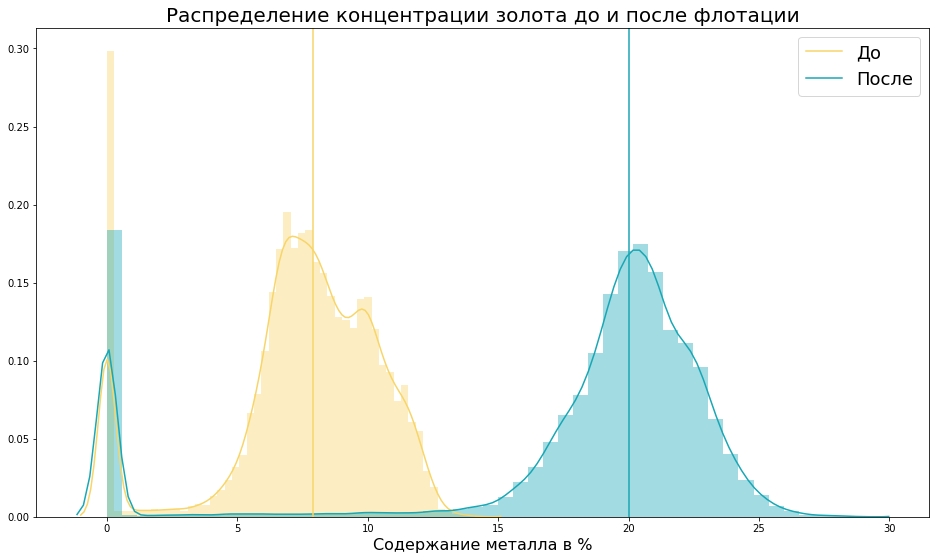

In [420]:
stage_progress_vis(gold_recovery_full, 
                   gold_recovery_full, 
                   'rougher.input.feed_au', 
                   'rougher.output.concentrate_au', 
                   'Распределение концентрации золота до и после флотации'
                  )

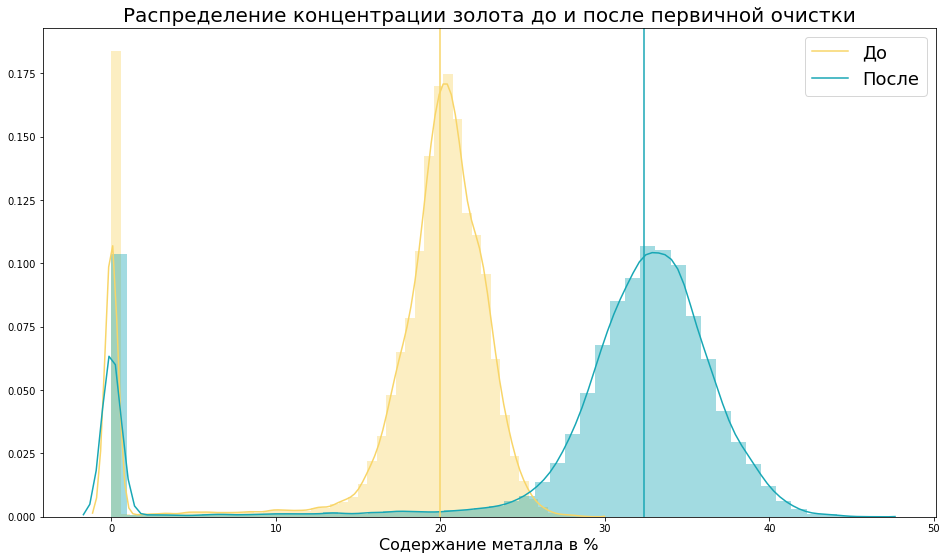

In [421]:
stage_progress_vis(gold_recovery_full,  gold_recovery_full,
                   'rougher.output.concentrate_au', 
                   'primary_cleaner.output.concentrate_au', 
                   'Распределение концентрации золота до и после первичной очистки')

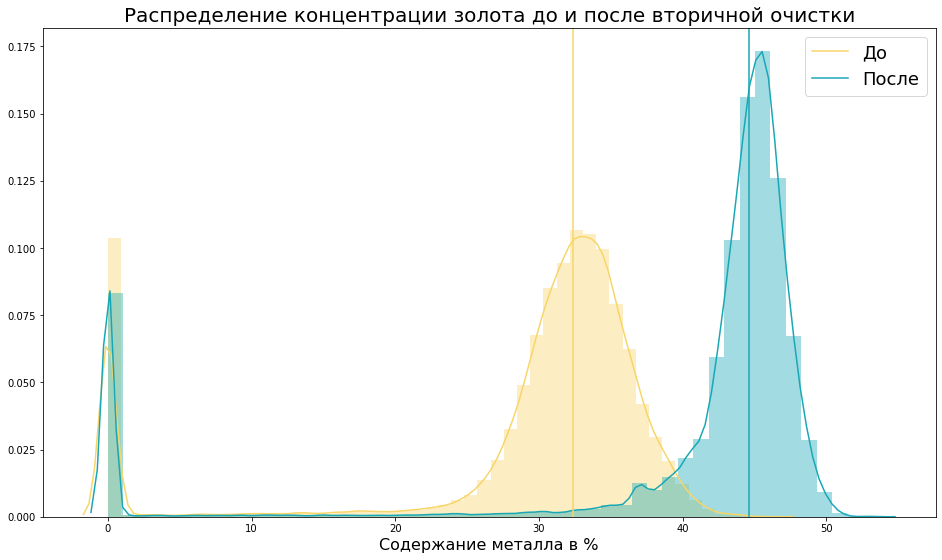

In [422]:
stage_progress_vis(gold_recovery_full,  gold_recovery_full,
                   'primary_cleaner.output.concentrate_au', 
                   'final.output.concentrate_au', 
                   'Распределение концентрации золота до и после вторичной очистки')

###### Серебро

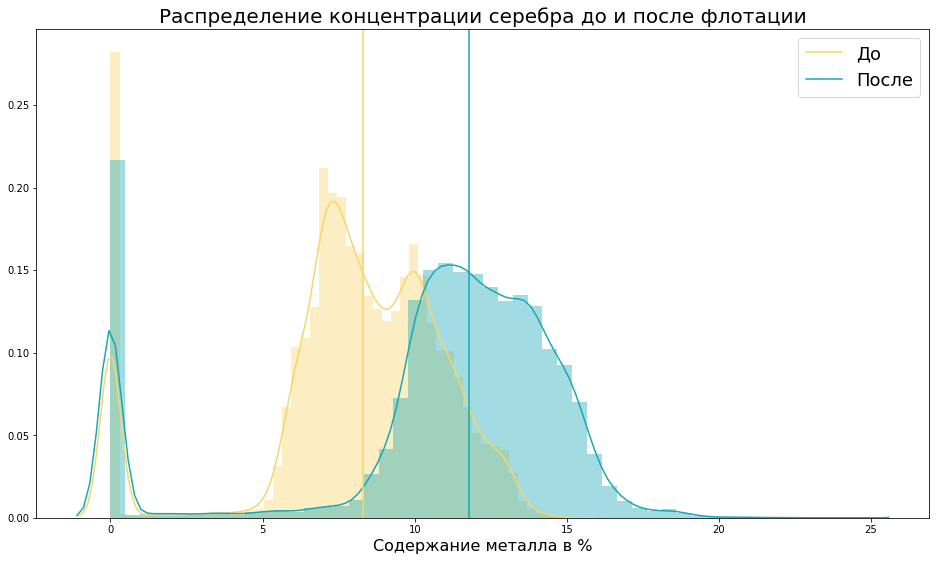

In [423]:
stage_progress_vis(gold_recovery_full, gold_recovery_full, 
                   'rougher.input.feed_ag', 
                   'rougher.output.concentrate_ag', 
                   'Распределение концентрации серебра до и после флотации')

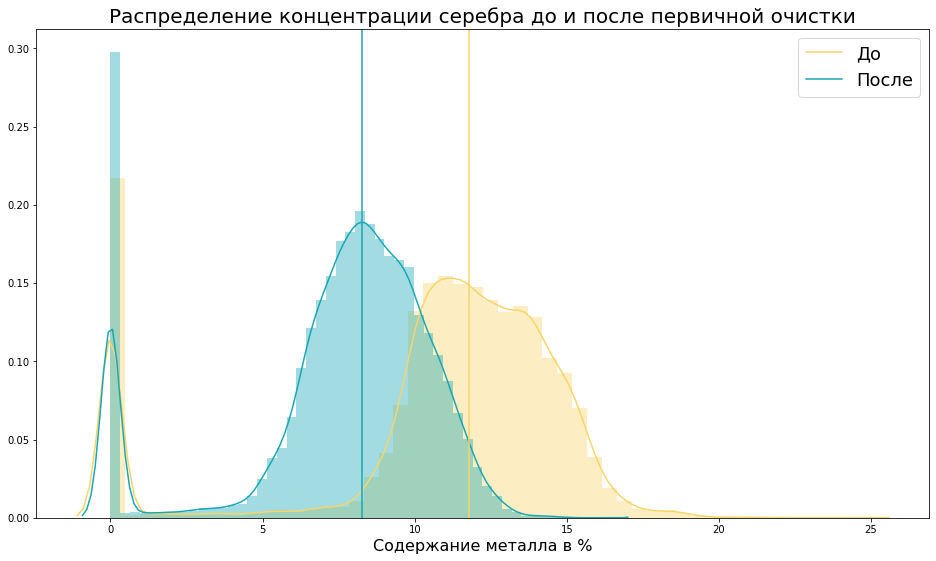

In [424]:
stage_progress_vis(gold_recovery_full, gold_recovery_full, 
                   'rougher.output.concentrate_ag', 
                   'primary_cleaner.output.concentrate_ag', 
                   'Распределение концентрации серебра до и после первичной очистки')

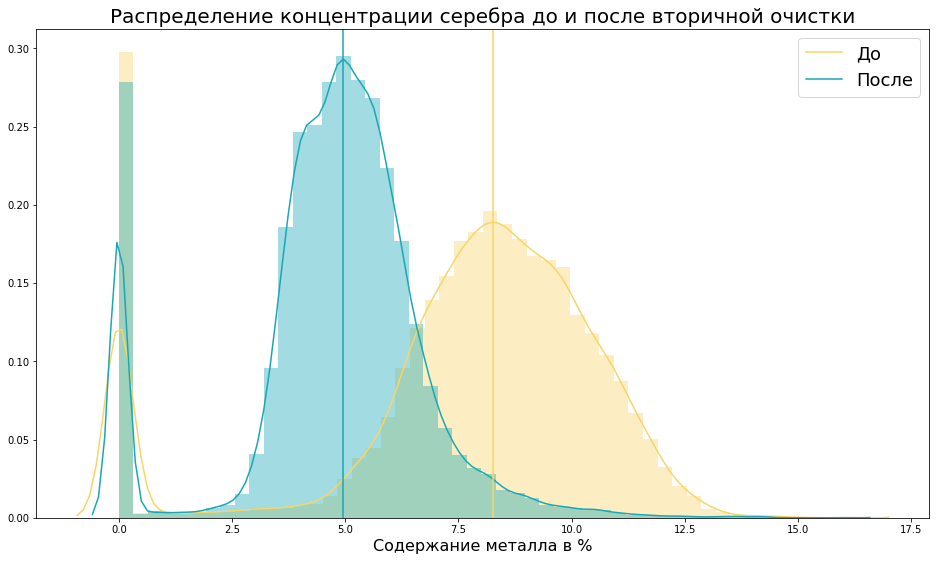

In [425]:
stage_progress_vis(gold_recovery_full, gold_recovery_full, 
                   'primary_cleaner.output.concentrate_ag', 
                   'final.output.concentrate_ag', 
                   'Распределение концентрации серебра до и после вторичной очистки')

###### Свинец

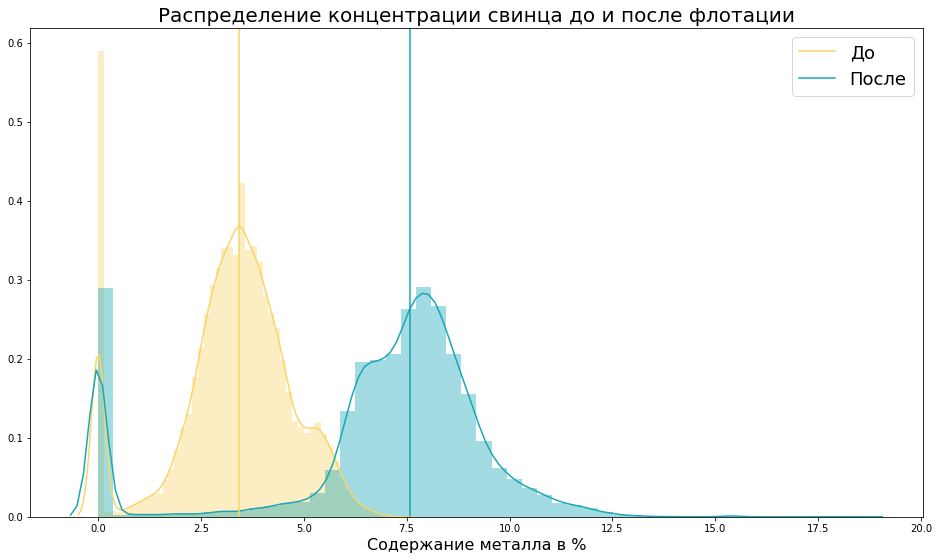

In [426]:
stage_progress_vis(gold_recovery_full, gold_recovery_full, 
                   'rougher.input.feed_pb', 
                   'rougher.output.concentrate_pb', 
                   'Распределение концентрации свинца до и после флотации')

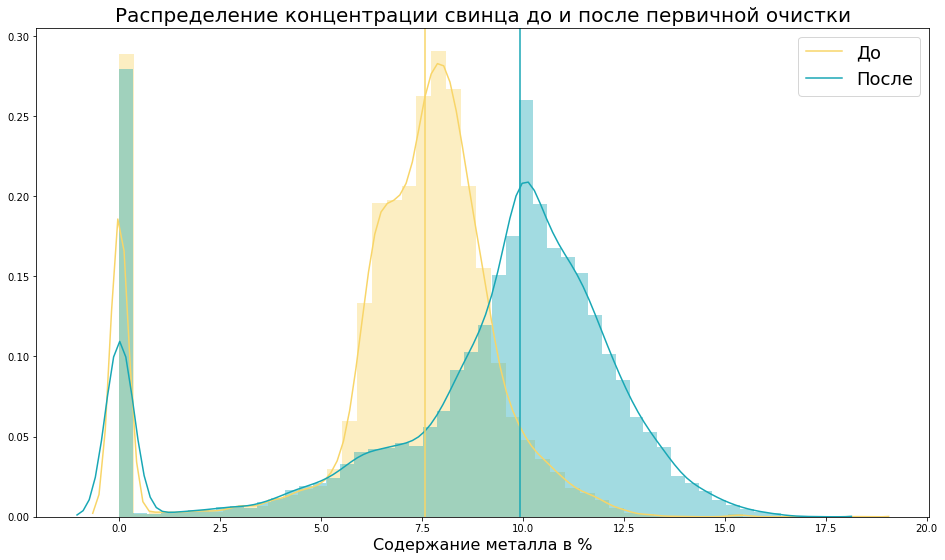

In [427]:
stage_progress_vis(gold_recovery_full, gold_recovery_full, 
                   'rougher.output.concentrate_pb', 
                   'primary_cleaner.output.concentrate_pb', 
                   'Распределение концентрации свинца до и после первичной очистки')

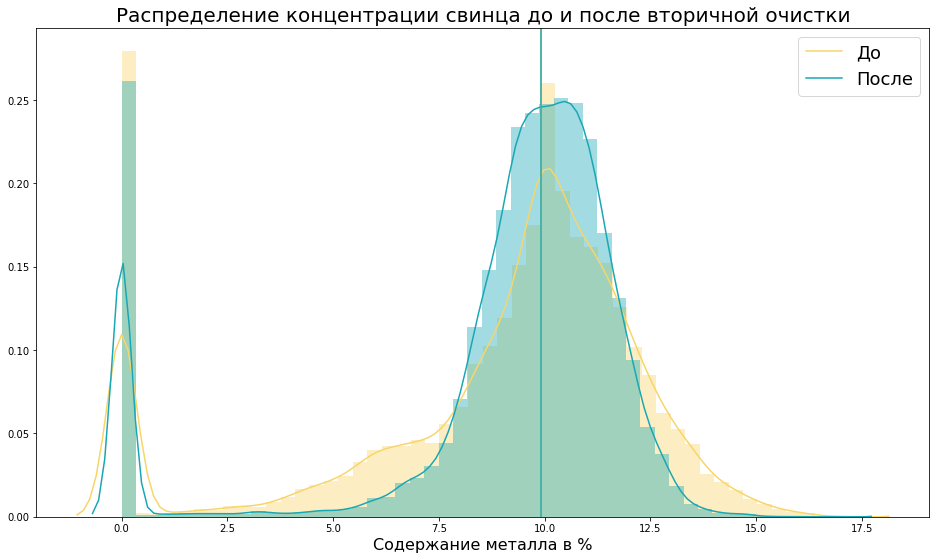

In [428]:
stage_progress_vis(gold_recovery_full, gold_recovery_full, 
                   'primary_cleaner.output.concentrate_pb', 
                   'final.output.concentrate_pb', 
                   'Распределение концентрации свинца до и после вторичной очистки')

In [429]:
stage_stat = get_results()

stage_stat = add_result(
    stage_stat, 
    gold_recovery_full,
    'Au', 
    'rougher.input.feed_au', 
    'rougher.output.concentrate_au', 
    'primary_cleaner.output.concentrate_au', 
    'final.output.concentrate_au'
)

stage_stat = add_result(
    stage_stat, 
    gold_recovery_full,
    'Ag', 
    'rougher.input.feed_ag', 
    'rougher.output.concentrate_ag', 
    'primary_cleaner.output.concentrate_ag', 
    'final.output.concentrate_ag'
)

stage_stat = add_result(
    stage_stat, 
    gold_recovery_full,
    'Pb', 
    'rougher.input.feed_pb', 
    'rougher.output.concentrate_pb', 
    'primary_cleaner.output.concentrate_pb', 
    'final.output.concentrate_pb'
)

display(stage_stat)

,Металл,До флотации. Мат. ожидание:,До флотации. Медиана:,После флотации. Мат. ожидание:,После флотации. Медиана:,После первичной очистки. Мат. ожидание:,После первичной очистки. Медиана:,После вторичной очистки. Мат. ожидание:,После вторичной очистки. Медиана:
0,Au,7.56723,7.88483,17.8887,20.0032,29.2259,32.3598,40.0188,44.6534
1,Ag,8.06674,8.30261,10.8784,11.7851,7.69413,8.26564,4.78223,4.95373
2,Pb,3.30703,3.43205,6.90355,7.57285,8.94083,9.92112,9.09845,9.91452


###### Вывод  

Как мы можем заметить по графикам построенным выше и по привиденной таблице.  
1. Концентрация золота увеличивается на каждом этапе очистки. И в итоге, в среднем, вырастает с 7.5% до 40%.
2. После флотации процентное содержание всех металлов вырастает. Можно предположить, что на этом этапе избавления от примесей серебра и свинца не происходит.  
3. В свою очередь, на последующих этапах, мы начинаем избавляться и от этих металлов в т.ч. Например, после первичной и вторичной очистки резко падает содержание серебра.
4. А содержание свинца после первичной очистки хоть и незначительно вырастает, но после вторичной - остаётся, примерно, на том же уровне, что позволяет сделать вывод, что от свинца (как минимум во время вторичной очистки мы избавляемся).

Кроме того построенные выше графики дают нам понять, что в столбцах содержания концентрации содержится довольно большое количество близких или равных нулю значений. Возможно, нам придется с ними расстаться.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

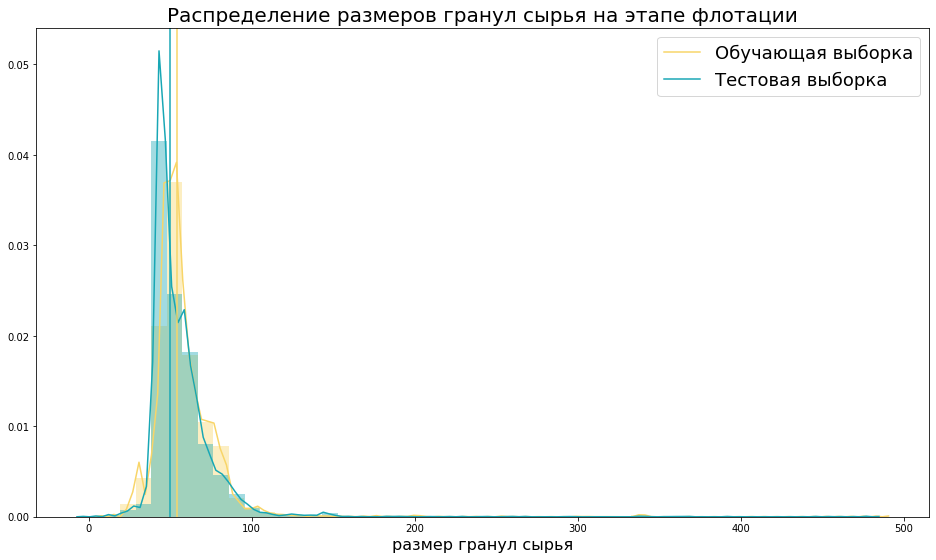

In [430]:
stage_progress_vis(gold_recovery_train, gold_recovery_test, 
                   'rougher.input.feed_size', 
                   'rougher.input.feed_size', 
                   'Распределение размеров гранул сырья на этапе флотации',
                  ox_label = 'размер гранул сырья',
                  legend = ['Обучающая выборка', 'Тестовая выборка'])

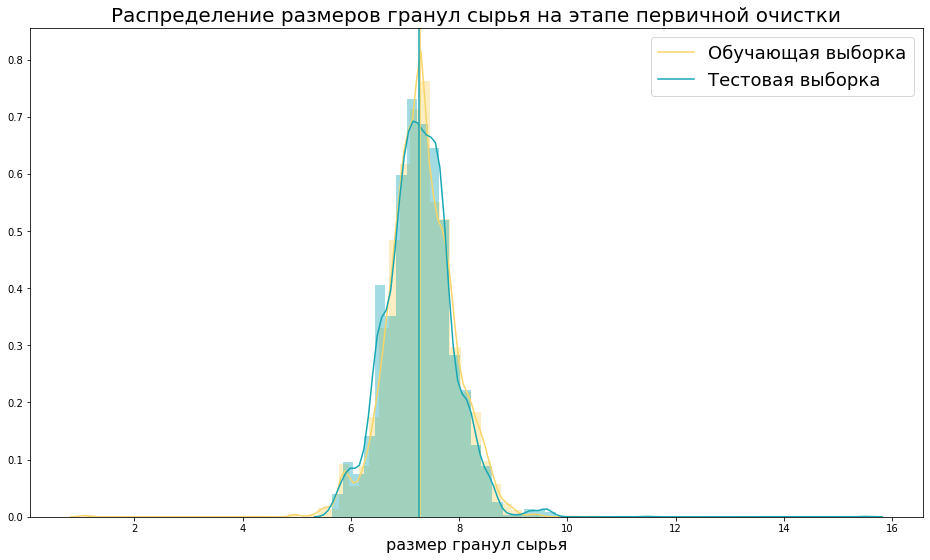

In [431]:
stage_progress_vis(gold_recovery_train, gold_recovery_test, 
                   'primary_cleaner.input.feed_size', 
                   'primary_cleaner.input.feed_size', 
                   'Распределение размеров гранул сырья на этапе первичной очистки',
                  ox_label = 'размер гранул сырья',
                  legend = ['Обучающая выборка', 'Тестовая выборка'])

###### Вывод: 
Графики демонстрируют, что распределения размеров гранул сырья отличаются не сильно и, практически, повторяют/налаживаются друг на друга.

### Cуммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Добавим колонки с суммарной концентрацией веществ на каждом этапе для обучающей и тестовой выборок.

In [432]:
gold_recovery_train['rougher.input.feed_sum'] = gold_recovery_train['rougher.input.feed_ag'] + gold_recovery_train['rougher.input.feed_pb'] + gold_recovery_train['rougher.input.feed_sol'] + gold_recovery_train['rougher.input.feed_au']
gold_recovery_train['rougher.output.concentrate_sum'] = gold_recovery_train['rougher.output.concentrate_ag'] + gold_recovery_train['rougher.output.concentrate_pb'] + gold_recovery_train['rougher.output.concentrate_sol'] + gold_recovery_train['rougher.output.concentrate_au']
gold_recovery_train['primary_cleaner.output.concentrate_sum'] = gold_recovery_train['primary_cleaner.output.concentrate_ag'] + gold_recovery_train['primary_cleaner.output.concentrate_pb'] + gold_recovery_train['primary_cleaner.output.concentrate_sol'] + gold_recovery_train['primary_cleaner.output.concentrate_au']
gold_recovery_train['final.output.concentrate_sum'] = gold_recovery_train['final.output.concentrate_ag'] + gold_recovery_train['final.output.concentrate_pb'] + gold_recovery_train['final.output.concentrate_sol'] + gold_recovery_train['final.output.concentrate_au']

In [433]:
gold_recovery_test['rougher.input.feed_sum'] = gold_recovery_test['rougher.input.feed_ag'] + gold_recovery_test['rougher.input.feed_pb'] + gold_recovery_test['rougher.input.feed_sol'] + gold_recovery_test['rougher.input.feed_au']

#gold_recovery_test['rougher.output.concentrate_sum'] = gold_recovery_test['rougher.output.concentrate_ag'] + gold_recovery_test['rougher.output.concentrate_pb'] + gold_recovery_test['rougher.output.concentrate_sol'] + gold_recovery_test['rougher.output.concentrate_au']
#gold_recovery_test['primary_cleaner.output.concentrate_sum'] = gold_recovery_test['primary_cleaner.output.concentrate_ag'] + gold_recovery_test['primary_cleaner.output.concentrate_pb'] + gold_recovery_test['primary_cleaner.output.concentrate_sol'] + gold_recovery_test['primary_cleaner.output.concentrate_au']
#gold_recovery_test['final.output.concentrate_sum'] = gold_recovery_test['final.output.concentrate_ag'] + gold_recovery_test['final.output.concentrate_pb'] + gold_recovery_test['final.output.concentrate_sol'] + gold_recovery_test['final.output.concentrate_au']

Напишем функцию отображения распределения суммарной концентрации: 

In [434]:
def stage_conc_vis(data, field, title, ox_label = 'Суммарная концентрация в %'):
    plt.figure(figsize=(16,9))
    sns.distplot(data[field], color = '#f8d568')
    plt.axvline(data[field].median(), color = '#f8d568')
    plt.xlabel(ox_label, fontsize=16)
    plt.title(title, fontsize=20)

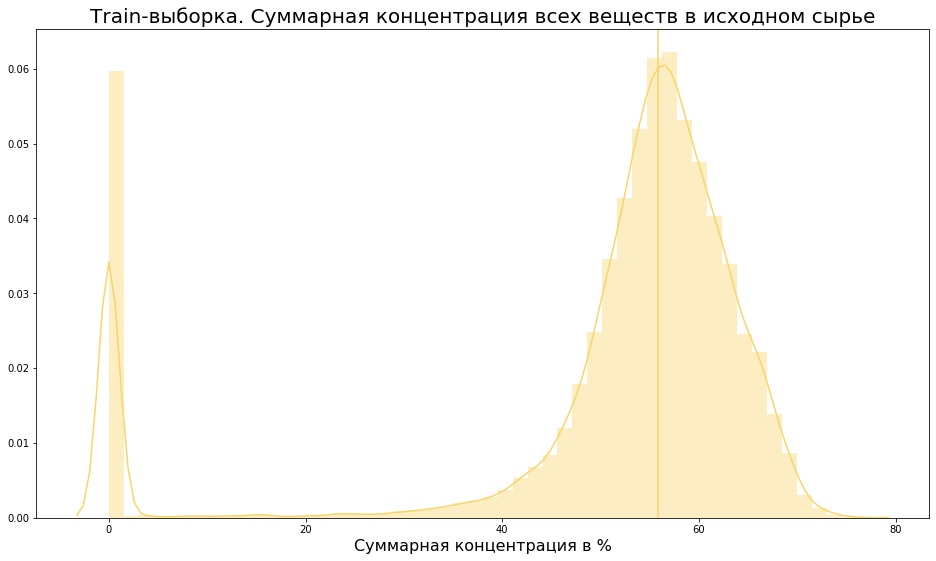

In [435]:
stage_conc_vis(gold_recovery_train, 'rougher.input.feed_sum', 'Train-выборка. Суммарная концентрация всех веществ в исходном сырье', ox_label = 'Суммарная концентрация в %')

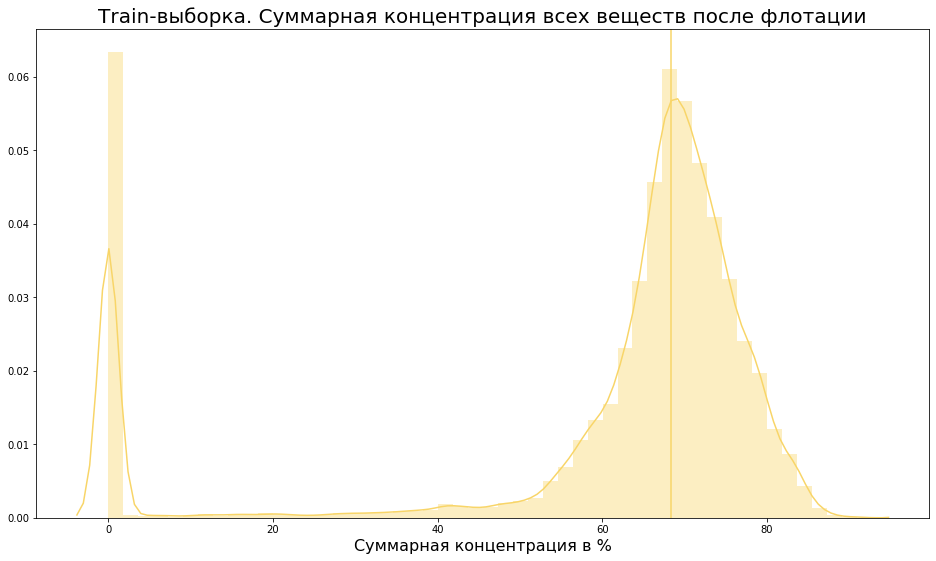

In [436]:
stage_conc_vis(gold_recovery_train, 'rougher.output.concentrate_sum', 'Train-выборка. Суммарная концентрация всех веществ после флотации', ox_label = 'Суммарная концентрация в %')

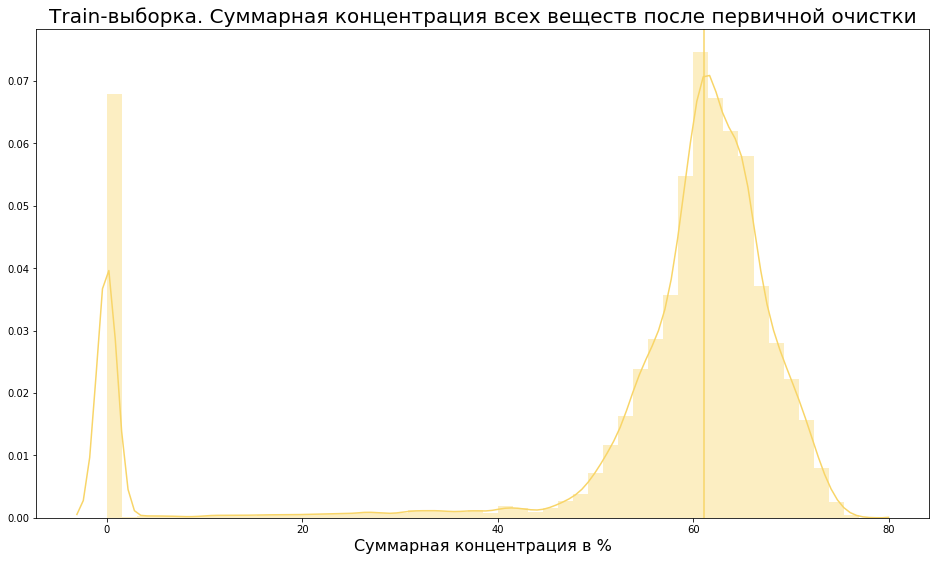

In [437]:
stage_conc_vis(gold_recovery_train, 'primary_cleaner.output.concentrate_sum', 'Train-выборка. Суммарная концентрация всех веществ после первичной очистки', ox_label = 'Суммарная концентрация в %')

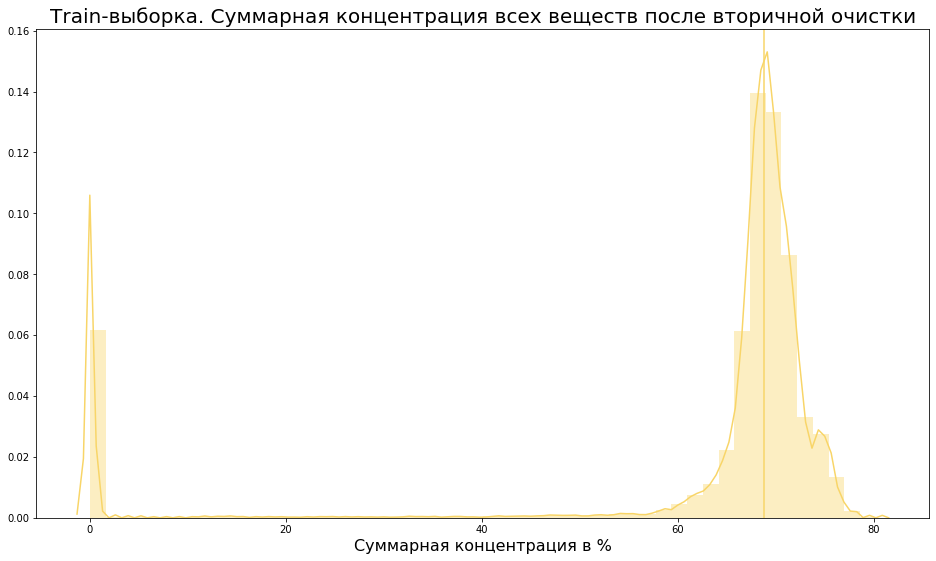

In [438]:
stage_conc_vis(gold_recovery_train, 'final.output.concentrate_sum', 'Train-выборка. Суммарная концентрация всех веществ после вторичной очистки', ox_label = 'Суммарная концентрация в %')

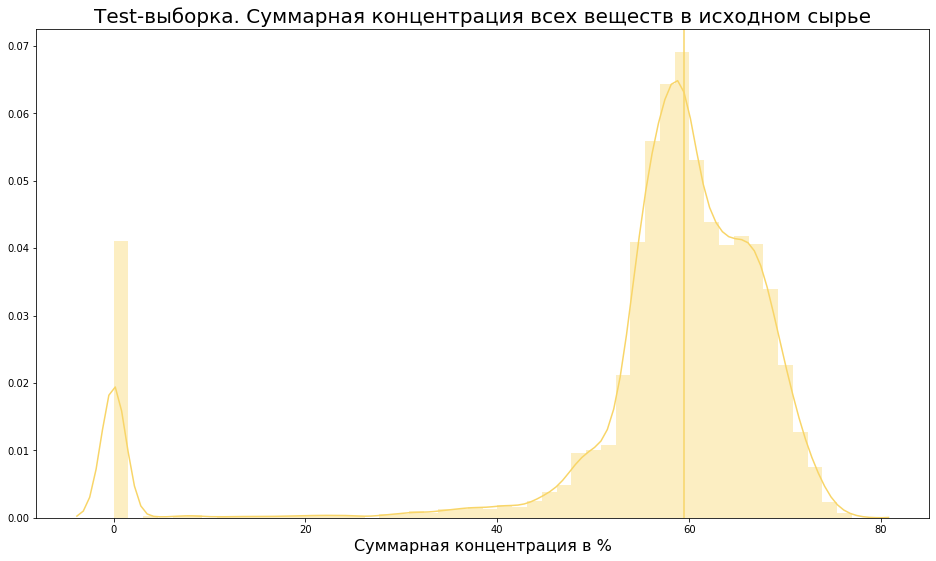

In [439]:
stage_conc_vis(gold_recovery_test, 'rougher.input.feed_sum', 'Test-выборка. Суммарная концентрация всех веществ в исходном сырье', ox_label = 'Суммарная концентрация в %')

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> 
Найдем нижнюю границу ящика с усами. И найдем границы исследуемых параметров.
</div>

In [440]:
def find_border(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5 * iqr, q3 + 1.5 * iqr

In [441]:
print(find_border(gold_recovery_train['rougher.input.feed_sum']))
print(find_border(gold_recovery_train['rougher.output.concentrate_sum']))
print(find_border(gold_recovery_train['primary_cleaner.output.concentrate_sum']))
print(find_border(gold_recovery_train['final.output.concentrate_sum']))

print(find_border(gold_recovery_test['rougher.input.feed_sum']))

(36.11355392602475, 74.77243482486129)
(44.67168779540699, 90.02514920411502)
(42.26230043386546, 78.41940002256631)
(60.89594739600001, 76.58924341866727)
(41.69850349842584, 78.43144089547513)


###### Вывод:
Как видим по графикам выше - очень много значений суммарной концентрации находится около 0. Причем на всех этапах. С точки зрения логики и прогнозирования - эти данные являются не совсем корректными. Большинство значений приходит на вход с суммарной концентрацией > 20-40%. А эти данные, явно являются выбросами, которые могут негативно повлиять на обучение модели. Поэтому принимаем решение - удалить эти данные - оставим только те, что больше 1.

In [442]:
gold_recovery_train = gold_recovery_train.loc[(gold_recovery_train['final.output.concentrate_sum'] > 1) |
                                          (gold_recovery_train['rougher.input.feed_sum'] > 1) |
                                          (gold_recovery_train['rougher.output.concentrate_sum'] > 1) |
                                          (gold_recovery_train['primary_cleaner.output.concentrate_sum'] > 1)]


In [443]:
gold_recovery_test = gold_recovery_test.loc[gold_recovery_test['rougher.input.feed_sum'] > 1]

Проверим мнова наши распределения

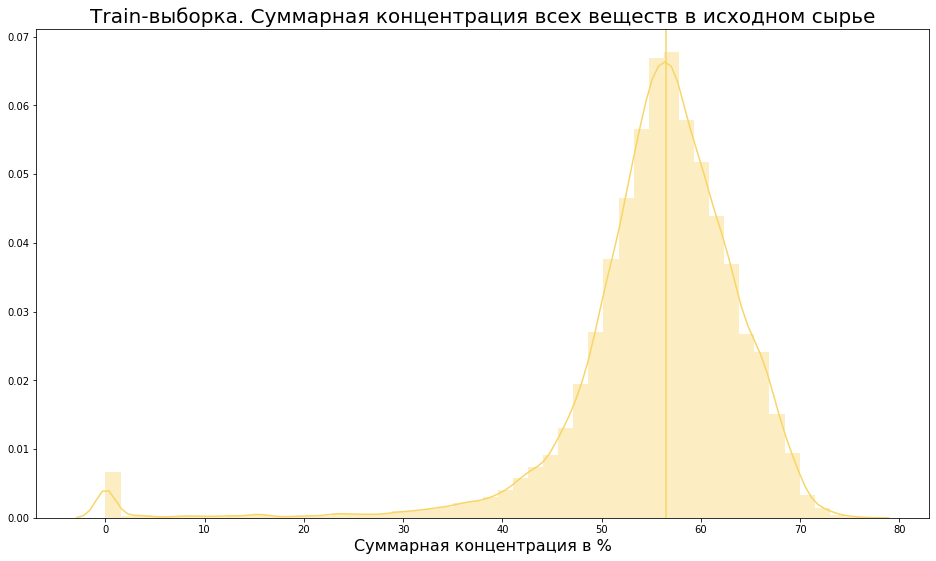

In [444]:
stage_conc_vis(gold_recovery_train, 'rougher.input.feed_sum', 'Train-выборка. Суммарная концентрация всех веществ в исходном сырье', ox_label = 'Суммарная концентрация в %')

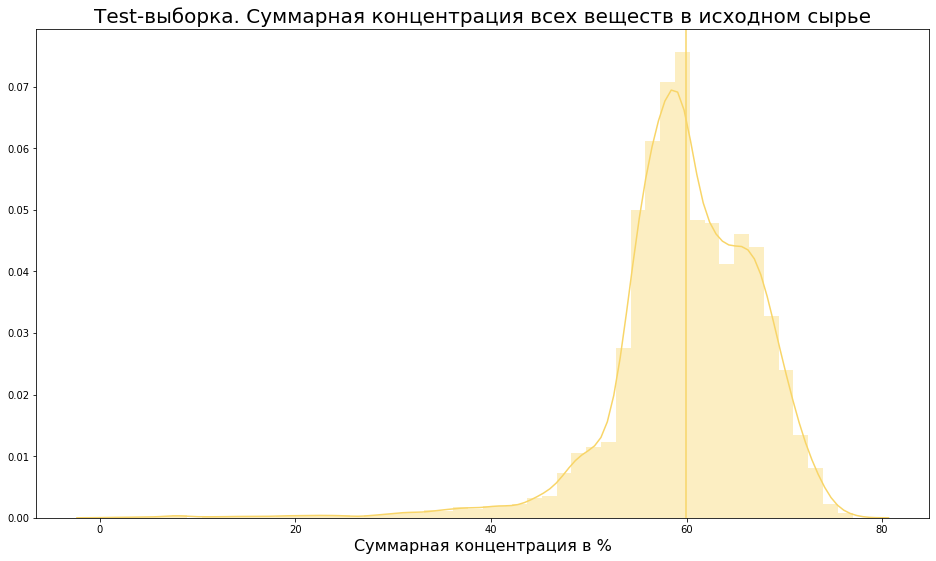

In [445]:
stage_conc_vis(gold_recovery_test, 'rougher.input.feed_sum', 'Test-выборка. Суммарная концентрация всех веществ в исходном сырье', ox_label = 'Суммарная концентрация в %')

Отлично. Выбросы больше нет.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

## 3. Модель

### Функция для вычисления итоговой sMAPE

In [446]:
def find_smape(target, predict, greater_is_better = False):
    #target_ = target.reset_index(drop = True)
    ##predict_ = predict.reset_index(drop = True)
    
    #N = len(target_)
    #sum = 0
    #for i in target_.index:
    #    t = target_[i]
    #    p = predict[i]
    #    value = abs(t - p) / ((abs(t) + abs(p)) / 2)
    #    sum = sum + value
    #return sum * 100 / N
    
    target_ = target.reset_index(drop = True)
    predict_ = pd.Series(predict).reset_index(drop = True)

    data_ = pd.DataFrame({'val1':target_, 'val2':predict_})

    data_['smape'] = abs(data_['val1'] - data_['val2']) / ((abs(data_['val1']) + abs(data_['val2'])) / 2)

    return data_['smape'].sum() / len(target_) * 100

In [447]:
def find_total_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

### Обучение моделей

#### Флотация. Эффективность обогащения чернового концентрата.

Сформируем обучающую выборку с необходимыми параметрами, которые актуальны на этапе флотации.  
Для этого сформируем train и test датасеты со следующими колонками:

In [448]:
rougher_columns = [
'rougher.input.feed_ag',
'rougher.input.feed_pb',
'rougher.input.feed_rate',
'rougher.input.feed_size',
'rougher.input.feed_sol',
'rougher.input.feed_au',
'rougher.input.floatbank10_sulfate',
'rougher.input.floatbank10_xanthate',
'rougher.input.floatbank11_sulfate',
'rougher.input.floatbank11_xanthate',
'rougher.state.floatbank10_a_air',
'rougher.state.floatbank10_a_level',
'rougher.state.floatbank10_b_air',
'rougher.state.floatbank10_b_level',
'rougher.state.floatbank10_c_air',
'rougher.state.floatbank10_c_level',
'rougher.state.floatbank10_d_air',
'rougher.state.floatbank10_d_level',
'rougher.state.floatbank10_e_air',
'rougher.state.floatbank10_e_level',
'rougher.state.floatbank10_f_air',
'rougher.state.floatbank10_f_level'
]

In [449]:
features_rougher_train = gold_recovery_train[rougher_columns]
features_rougher_test = gold_recovery_test[rougher_columns]

Установим целевой признак для обучающей выборки

In [450]:
target_rougher_train = gold_recovery_train['rougher.output.recovery']

Достанем целевой для тестовой выборки из gold_recovery_full

In [451]:
dates = gold_recovery_test['date']
target_rougher_test = gold_recovery_full.query('date in @dates')['rougher.output.recovery']
target_rougher_test.index = gold_recovery_test.index

Построим матрицу корреляции перечисленных выше колонок и целевого признака.

In [452]:
def data_corr(data, features_cols, target_col):
    cols = features_cols[:]
    cols.append(target_col)
    data = data[cols]
    plt.figure(figsize=(16,9))
    corr = data.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot = True)

CPU times: user 685 ms, sys: 16.6 ms, total: 702 ms
Wall time: 728 ms


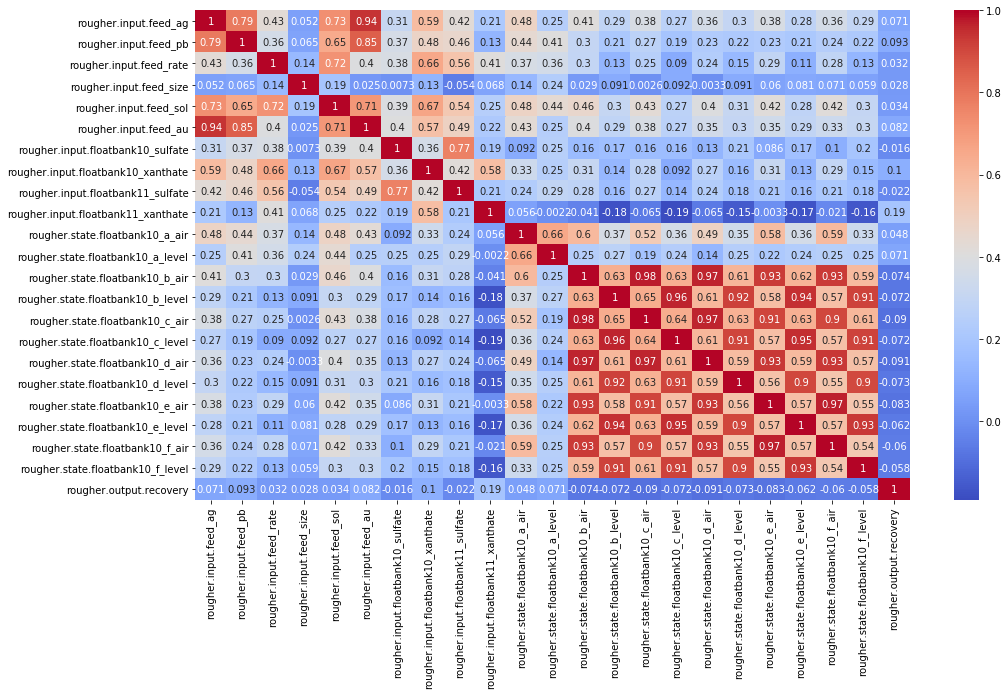

In [453]:
%%time
data_corr(gold_recovery_full, rougher_columns, 'rougher.output.recovery')

Целевой признак не с одним из иных признаков не коррелирует - утечки данных не произошло.

In [454]:
rougher_columns = [
'rougher.input.feed_pb',
'rougher.input.feed_rate',
'rougher.input.feed_size',
'rougher.input.feed_sol',
'rougher.input.feed_au',
'rougher.input.floatbank10_sulfate',
'rougher.input.floatbank10_xanthate',
'rougher.input.floatbank11_xanthate',
'rougher.state.floatbank10_a_air',
'rougher.state.floatbank10_a_level',
'rougher.state.floatbank10_f_air',
'rougher.state.floatbank10_f_level',
]

In [455]:
features_rougher_train = gold_recovery_train[rougher_columns]
features_rougher_test = gold_recovery_test[rougher_columns]

CPU times: user 268 ms, sys: 15.4 ms, total: 284 ms
Wall time: 304 ms


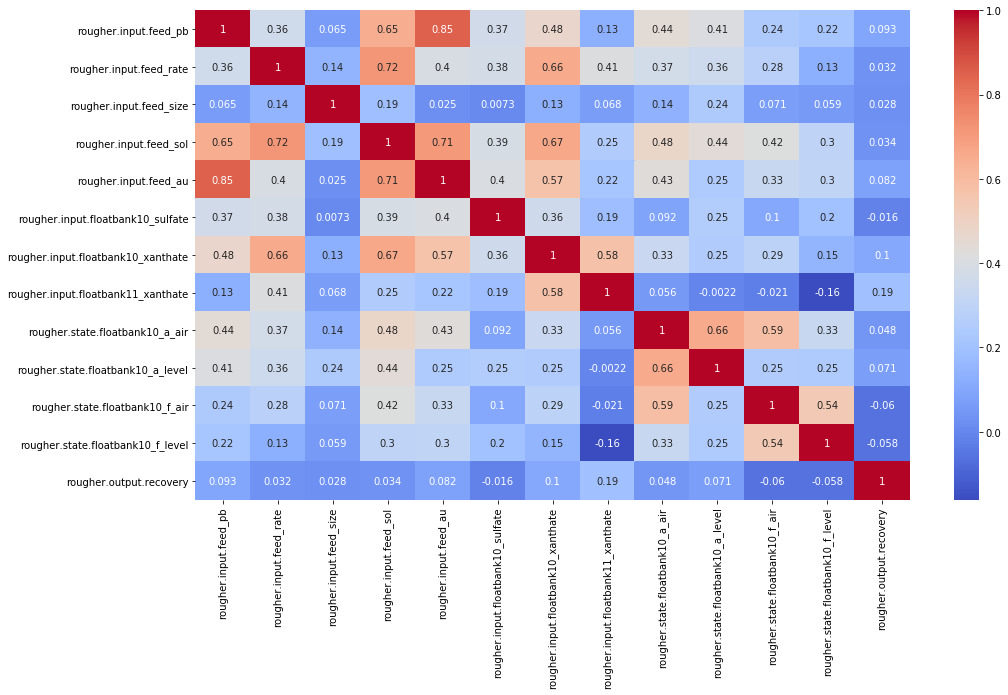

In [456]:
%%time
data_corr(gold_recovery_full, rougher_columns, 'rougher.output.recovery')

Напишем функцию поиска наилучших параметров и лучшего sMAPE с помощью кроссвалидации.

In [457]:
def cross_validation(model, params, features, target):
    
    param_dist = params  
#   scorer = {'smape_score': make_scorer(find_smape, greater_is_better = True)}
    
    cv = GridSearchCV(model,
                      param_grid=param_dist,
                      cv = 5,
                      scoring = make_scorer(find_smape, greater_is_better = False)
                    )
    
    cv.fit(features, target)
    
    return cv.best_params_, cv.best_score_

In [458]:
def get_model_info():
    df = pd.DataFrame(columns=['Модель: ',
                               'sMAPE: ', 
                               'Параметры: '])
    return df

def add_result(df, model_name, result, params):
    df = df.set_value(len(df), 'Модель: ', model_name)
    df = df.set_value(len(df) - 1, 'sMAPE: ', result)
    df = df.set_value(len(df) - 1, 'Параметры: ', params)

    return df

In [459]:
model_info = get_model_info()

##### Линейная регрессия

In [460]:
%%time
linreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
results_lr = cross_validation(linreg, parameters, features_rougher_train, target_rougher_train)

print('Наилучшие параметры: ', results_lr[0])
print('Наилучший sMAPE: ', abs(results_lr[1]))

model_info = add_result(model_info, 'LinearRegression', str(abs(results_lr[1])), str(results_lr[0]))

Наилучшие параметры:  {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Наилучший sMAPE:  11.855458960737048
CPU times: user 3.39 s, sys: 3.48 s, total: 6.87 s
Wall time: 6.86 s


##### HuberRegressor

In [461]:
%%time
HuberReg = HuberRegressor()
parameters = {'fit_intercept':[True,False], 'warm_start':[True,False]}
results_hu = cross_validation(HuberReg, parameters, features_rougher_train, target_rougher_train)

print('Наилучшие параметры: ', results_hu[0])
print('Наилучший sMAPE: ', abs(results_hu[1]))

model_info = add_result(model_info, 'HuberRegressor', str(abs(results_hu[1])), str(results_hu[0]))

Наилучшие параметры:  {'fit_intercept': True, 'warm_start': True}
Наилучший sMAPE:  13.634345542178393
CPU times: user 31 s, sys: 29.8 s, total: 1min
Wall time: 1min 1s


##### SGDRegressor

In [462]:
%%time
sgd_reg = SGDRegressor()
parameters = {
    'loss':['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
    'penalty':['l2', 'l1', 'elasticnet'],
    'fit_intercept':[True,False]
}
results_sgd = cross_validation(sgd_reg, parameters, features_rougher_train, target_rougher_train)

print('Наилучшие параметры: ', results_sgd[0])
print('Наилучший sMAPE: ', abs(results_sgd[1]))

model_info = add_result(model_info, 'SGDRegressor', str(abs(results_sgd[1])), str(results_sgd[0]))

Наилучшие параметры:  {'fit_intercept': False, 'loss': 'huber', 'penalty': 'l2'}
Наилучший sMAPE:  34.92956272945623
CPU times: user 1min 11s, sys: 10.5 s, total: 1min 21s
Wall time: 1min 21s


##### DummyRegressor

In [463]:
%%time
dmm_reg = DummyRegressor()
parameters = {
    'strategy':['quantile'],
    'quantile': np.arange(0.1, 1.0, 0.1)
}
results_dmm = cross_validation(dmm_reg, parameters, features_rougher_train, target_rougher_train)

print('Наилучшие параметры: ', results_dmm[0])
print('Наилучший sMAPE: ', abs(results_dmm[1]))

model_info = add_result(model_info, 'DummyRegressor', str(abs(results_dmm[1])), str(results_dmm[0]))

Наилучшие параметры:  {'quantile': 0.5, 'strategy': 'quantile'}
Наилучший sMAPE:  11.181460602743625
CPU times: user 296 ms, sys: 2.27 ms, total: 299 ms
Wall time: 308 ms


##### RandomForestRegressor

In [464]:
%%time
forest_reg = RandomForestRegressor(random_state = random_value)
parameters = {
    'n_estimators':[10, 100],  #[10, 50, 100],
    'max_depth':[5, 20]             #[5, 20, 50]
}

results_forest = cross_validation(forest_reg, parameters, features_rougher_train, target_rougher_train)

print('Наилучшие параметры: ', results_forest[0])
print('Наилучший sMAPE: ', abs(results_forest[1]))

model_info = add_result(model_info, 'RandomForestRegressor', str(abs(results_forest[1])), str(results_forest[0]))

Наилучшие параметры:  {'max_depth': 5, 'n_estimators': 10}
Наилучший sMAPE:  12.008924211929017
CPU times: user 1min 58s, sys: 0 ns, total: 1min 58s
Wall time: 1min 59s


#### Очистка. Эффективность обогащения финального концентрата.

Сформируем обучающую выборку с необходимыми параметрами, которые актуальны на этапе очистки.    
Для этого сформируем train и test датасеты со следующими колонками:  
(Поскольку содержания входных концентратов зависит от этапа флотации - необходимо включить и данные этапа флотации в тренировочный и тестовый датасет)

In [465]:
final_columns = [
'rougher.input.feed_ag',
'rougher.input.feed_pb',
'rougher.input.feed_rate',
'rougher.input.feed_size',
'rougher.input.feed_sol',
'rougher.input.feed_au',
'rougher.input.floatbank10_sulfate',
'rougher.input.floatbank10_xanthate',
'rougher.input.floatbank11_sulfate',
'rougher.input.floatbank11_xanthate',
'rougher.state.floatbank10_a_air',
'rougher.state.floatbank10_a_level',
'rougher.state.floatbank10_b_air',
'rougher.state.floatbank10_b_level',
'rougher.state.floatbank10_c_air',
'rougher.state.floatbank10_c_level',
'rougher.state.floatbank10_d_air',
'rougher.state.floatbank10_d_level',
'rougher.state.floatbank10_e_air',
'rougher.state.floatbank10_e_level',
'rougher.state.floatbank10_f_air',
'rougher.state.floatbank10_f_level',
'primary_cleaner.input.sulfate',
'primary_cleaner.input.depressant',
'primary_cleaner.input.feed_size',
'primary_cleaner.input.xanthate',
'primary_cleaner.state.floatbank8_a_air',
'primary_cleaner.state.floatbank8_a_level',
'primary_cleaner.state.floatbank8_b_air',
'primary_cleaner.state.floatbank8_b_level',
'primary_cleaner.state.floatbank8_c_air',
'primary_cleaner.state.floatbank8_c_level',
'primary_cleaner.state.floatbank8_d_air',     
'primary_cleaner.state.floatbank8_d_level'
]

In [466]:
features_final_train = gold_recovery_train[final_columns]
features_final_test = gold_recovery_test[final_columns]

Установим целевой признак для обучающей выборки

In [467]:
target_final_train = gold_recovery_train['final.output.recovery']

Достанем целевой для тестовой выборки из gold_recovery_full

In [468]:
dates = gold_recovery_test['date']
target_final_test = gold_recovery_full.query('date in @dates')['final.output.recovery']
target_final_test.index = gold_recovery_test.index

Построим матрицу корреляции перечисленных выше колонок и целевого признака

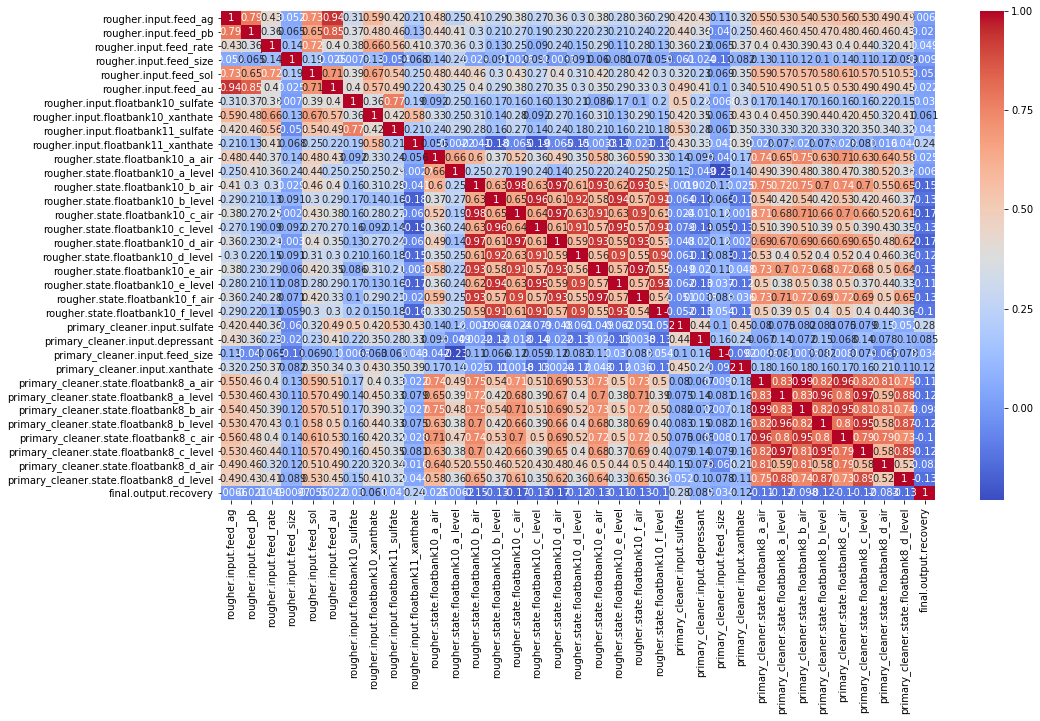

In [469]:
data_corr(gold_recovery_full, final_columns, 'final.output.recovery')

Целевой признак не с одним из иных признаков не коррелирует - утечки данных не произошло.

In [470]:
final_columns = [
'rougher.input.feed_pb',
'rougher.input.feed_rate',
'rougher.input.feed_size',
'rougher.input.feed_sol',
'rougher.input.feed_au',
'rougher.input.floatbank10_sulfate',
'rougher.input.floatbank10_xanthate',
'rougher.input.floatbank11_xanthate',
'rougher.state.floatbank10_a_air',
'rougher.state.floatbank10_a_level',
'rougher.state.floatbank10_f_air',
'rougher.state.floatbank10_f_level',
'primary_cleaner.input.sulfate',
'primary_cleaner.input.depressant',
'primary_cleaner.input.feed_size',
'primary_cleaner.input.xanthate',
'primary_cleaner.state.floatbank8_a_air',
'primary_cleaner.state.floatbank8_a_level',
'primary_cleaner.state.floatbank8_d_air',     
'primary_cleaner.state.floatbank8_d_level'
]

In [471]:
features_final_train = gold_recovery_train[final_columns]
features_final_test = gold_recovery_test[final_columns]

CPU times: user 684 ms, sys: 0 ns, total: 684 ms
Wall time: 714 ms


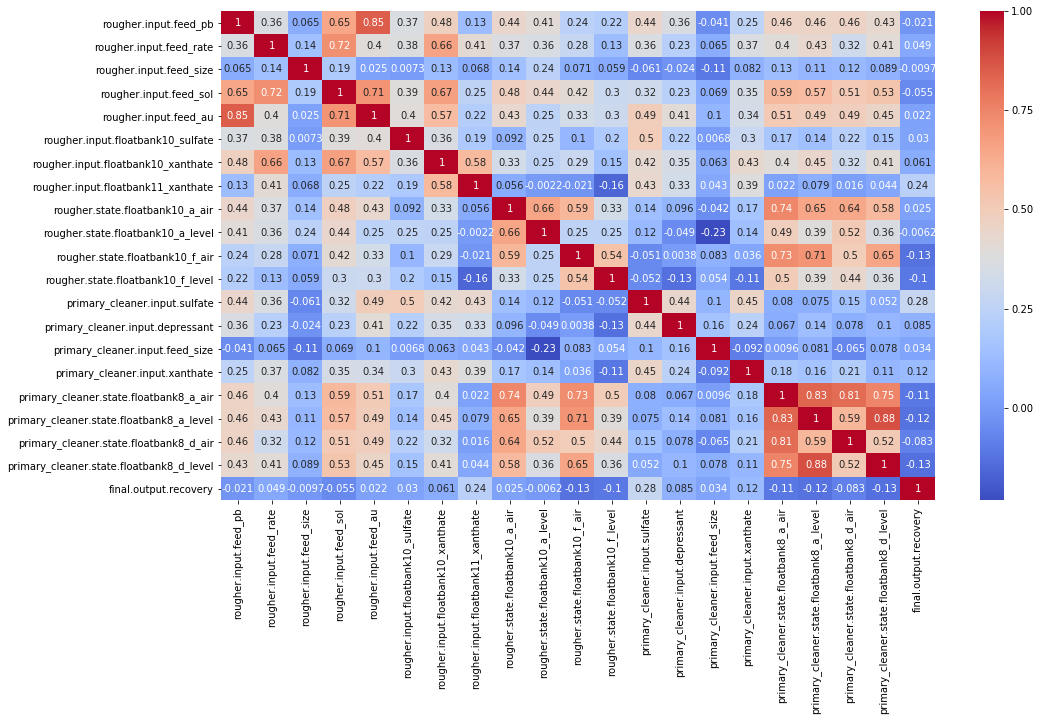

In [472]:
%%time
data_corr(gold_recovery_full, final_columns, 'final.output.recovery')

##### Линейная регрессия

In [473]:
%%time
linreg2 = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
results_lr2 = cross_validation(linreg2, parameters, features_final_train, target_final_train)

print('Наилучшие параметры: ', results_lr2[0])
print('Наилучший sMAPE: ', abs(results_lr2[1]))

model_info = add_result(model_info, 'LinearRegression. 2 этап.', str(abs(results_lr2[1])), str(results_lr2[0]))

Наилучшие параметры:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Наилучший sMAPE:  11.380581354502281
CPU times: user 3.35 s, sys: 4.35 s, total: 7.7 s
Wall time: 7.65 s


##### HuberRegressor

In [474]:
%%time
HuberReg2 = HuberRegressor()
parameters = {'fit_intercept':[True,False], 'warm_start':[True,False]}
results_hu2 = cross_validation(HuberReg2, parameters, features_final_train, target_final_train)

print('Наилучшие параметры: ', results_hu2[0])
print('Наилучший sMAPE: ', abs(results_hu2[1]))

model_info = add_result(model_info, 'HuberRegressor. 2 этап.', str(abs(results_hu2[1])), str(results_hu2[0]))

Наилучшие параметры:  {'fit_intercept': True, 'warm_start': True}
Наилучший sMAPE:  11.263254756616886
CPU times: user 50.4 s, sys: 1min 2s, total: 1min 52s
Wall time: 1min 52s


##### SGDRegressor

In [475]:
%%time
sgd_reg2 = SGDRegressor()
parameters = {
    'loss':['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
    'penalty':['l2', 'l1', 'elasticnet'],
    'fit_intercept':[True,False]
}
results_sgd2 = cross_validation(sgd_reg, parameters, features_final_train, target_final_train)

print('Наилучшие параметры: ', results_sgd2[0])
print('Наилучший sMAPE: ', abs(results_sgd2[1]))

model_info = add_result(model_info, 'SGDRegressor. 2 этап.', str(abs(results_sgd2[1])), str(results_sgd2[0]))

Наилучшие параметры:  {'fit_intercept': False, 'loss': 'huber', 'penalty': 'l2'}
Наилучший sMAPE:  60.75808068647643
CPU times: user 1min 35s, sys: 9.93 s, total: 1min 45s
Wall time: 1min 45s


##### DummyRegressor

In [476]:
%%time
dmm_reg2 = DummyRegressor()
parameters = {
    'strategy':['quantile'],
    'quantile': np.arange(0.1, 1.0, 0.1)
}
results_dmm2 = cross_validation(dmm_reg2, parameters, features_final_train, target_final_train)

print('Наилучшие параметры: ', results_dmm2[0])
print('Наилучший sMAPE: ', abs(results_dmm2[1]))

model_info = add_result(model_info, 'DummyRegressor. 2 этап.', str(abs(results_dmm2[1])), str(results_dmm2[0]))

Наилучшие параметры:  {'quantile': 0.5, 'strategy': 'quantile'}
Наилучший sMAPE:  11.514783397087735
CPU times: user 464 ms, sys: 34 µs, total: 464 ms
Wall time: 473 ms


##### RandomForestRegressor

In [477]:
%%time
forest_reg2 = RandomForestRegressor(random_state = random_value)
parameters = {
    'n_estimators':[10, 100], #[10, 50, 100],
    'max_depth':[5, 20]       #[5, 20, 50]
}

results_forest2 = cross_validation(forest_reg2, parameters, features_final_train, target_final_train)

print('Наилучшие параметры: ', results_forest2[0])
print('Наилучший sMAPE: ', abs(results_forest2[1]))

model_info = add_result(model_info, 'RandomForestRegressor. 2 этап.', str(abs(results_forest2[1])), str(results_forest2[0]))

Наилучшие параметры:  {'max_depth': 5, 'n_estimators': 100}
Наилучший sMAPE:  11.428217901227752
CPU times: user 3min 33s, sys: 0 ns, total: 3min 33s
Wall time: 3min 34s


#### Тестирование

In [478]:
model_info

,Модель:,sMAPE:,Параметры:
0,LinearRegression,11.855458960737048,"{'copy_X': True, 'fit_intercept': True, 'norma..."
1,HuberRegressor,13.634345542178393,"{'fit_intercept': True, 'warm_start': True}"
2,SGDRegressor,34.92956272945623,"{'fit_intercept': False, 'loss': 'huber', 'pen..."
3,DummyRegressor,11.181460602743625,"{'quantile': 0.5, 'strategy': 'quantile'}"
4,RandomForestRegressor,12.008924211929017,"{'max_depth': 5, 'n_estimators': 10}"
5,LinearRegression. 2 этап.,11.380581354502281,"{'copy_X': True, 'fit_intercept': False, 'norm..."
6,HuberRegressor. 2 этап.,11.263254756616886,"{'fit_intercept': True, 'warm_start': True}"
7,SGDRegressor. 2 этап.,60.75808068647643,"{'fit_intercept': False, 'loss': 'huber', 'pen..."
8,DummyRegressor. 2 этап.,11.514783397087735,"{'quantile': 0.5, 'strategy': 'quantile'}"
9,RandomForestRegressor. 2 этап.,11.428217901227752,"{'max_depth': 5, 'n_estimators': 100}"


На этапе флотации лучше всего себя показала модель DummyRegressor.
Наилучшие параметры:  {'quantile': 0.5, 'strategy': 'quantile'}.

Обучим её с данными параметрами на тестовой выборке и вычислим sMAPE.

In [479]:
dummy_model = DummyRegressor(strategy = 'quantile', quantile = 0.5)

dummy_model.fit(features_rougher_train, target_rougher_train)

predictions_rougher = dummy_model.predict(features_rougher_test)

In [480]:
%%time
rougher_smape = find_smape(target_rougher_test, predictions_rougher)
print('sMAPE на этапе флотации: ', rougher_smape)

sMAPE на этапе флотации:  8.547213962436826
CPU times: user 9.16 ms, sys: 0 ns, total: 9.16 ms
Wall time: 7.58 ms


На этапе очистки лучше всего себя показала модель RandomForestRegressor. Наилучшие параметры: {'max_depth': 5, 'n_estimators': 100}.

Обучим её с данными параметрами на тестовой выборке и вычислим sMAPE.


In [481]:
forest_model = RandomForestRegressor(max_depth = 5, n_estimators = 100, random_state = random_value)

forest_model.fit(features_final_train, target_final_train)

predictions_final = forest_model.predict(features_final_test)

In [482]:
final_smape = find_smape(target_final_test, predictions_final)
print('sMAPE на этапе очистки: ', final_smape)

sMAPE на этапе очистки:  9.76554223490034


In [483]:
print('Итоговое sMAPE: ', find_total_smape(rougher_smape, final_smape))

Итоговое sMAPE:  9.460960166784462


#### Проверка моделей на адекватность:

Этап флотации. Т.к. суть dummy regressor - заполнение значений медианой вычисленной при обучении. Можно предположить, что адекватностью она отличаться не будет, учитывая рассчет относительно среднего.

In [484]:
check_target_1 = pd.DataFrame(index=target_rougher_test.index, columns=['mean'], dtype='float')
check_target_1['mean'] = target_rougher_test.mean()

In [485]:
print('Проверка на адекватность - ', find_smape(target_rougher_test, check_target_1['mean']))

Проверка на адекватность -  8.697879302698375


Получили почти то же значение - 9.57 (чуть меньше. sMAPE модели - 9.28), что если бы заполняли средним.

In [486]:
check_target_2 = pd.DataFrame(index=target_final_test.index, columns=['mean'], dtype='float')
check_target_2['mean'] = target_final_test.mean()

In [487]:
print('Проверка на адекватность - ', find_smape(target_final_test, check_target_2['mean']))

Проверка на адекватность -  10.259179827131598


sMAPE на данном этапе 10.22. Проверка на адекватность показывает 10.88.
Наша модель хоть чуть-чуть, но лучше предсказывает относительно простого заполнения средними.

### Вывод
Написана функция для вычисления итогового значения sMAPE. 
Сформированы обучающие и тестовые выборки с необходимыми параметрами, которые актуальны на этапах флотации и очистки. По данным датасета gold_recovery_full и колонкам, вошедшим в обучающие и тестовые выборки и целевому признаку, были построены матрицы корреляции, на которых было отмечено, что целевой признак не с одним из иных признаков не коррелирует - утечки данных нет.  
Написана функция поиска наилучших параметров и лучшего sMAPE с помощью кроссвалидации.
С её помощью происследованы следующие модели и получены следующие результаты на этапе флотации.  

In [488]:
model_info.head(5)

,Модель:,sMAPE:,Параметры:
0,LinearRegression,11.855458960737048,"{'copy_X': True, 'fit_intercept': True, 'norma..."
1,HuberRegressor,13.634345542178393,"{'fit_intercept': True, 'warm_start': True}"
2,SGDRegressor,34.92956272945623,"{'fit_intercept': False, 'loss': 'huber', 'pen..."
3,DummyRegressor,11.181460602743625,"{'quantile': 0.5, 'strategy': 'quantile'}"
4,RandomForestRegressor,12.008924211929017,"{'max_depth': 5, 'n_estimators': 10}"


Лучшей моделью является модель DummyRegressor с параметрами –  
['quantile': 0.5, 'strategy': 'quantile'] (sMAPE = 13,82)  

Аналогичное исследование было проведено на этапе очистки. Получены следующие результаты:  

In [489]:
model_info.tail(5)

,Модель:,sMAPE:,Параметры:
5,LinearRegression. 2 этап.,11.380581354502281,"{'copy_X': True, 'fit_intercept': False, 'norm..."
6,HuberRegressor. 2 этап.,11.263254756616886,"{'fit_intercept': True, 'warm_start': True}"
7,SGDRegressor. 2 этап.,60.75808068647643,"{'fit_intercept': False, 'loss': 'huber', 'pen..."
8,DummyRegressor. 2 этап.,11.514783397087735,"{'quantile': 0.5, 'strategy': 'quantile'}"
9,RandomForestRegressor. 2 этап.,11.428217901227752,"{'max_depth': 5, 'n_estimators': 100}"


Лучшей моделью является модель RandomForestRegressor с параметрами –  
['max_depth': 5, 'n_estimators': 100] (sMAPE = 12,68)  


Обучив эти модели на соответствующих обучающих датасетах, мы предсказали значения эффективности обогащения по тестовому датасету.   
На этапе флотации метрика sMAPE оказалась равной 9.28 
На этапе очистки - 10.22  
Итоговое значение - 9.98  

## Вывод
### Подготовка данных
На первом этапе были изучены исходные данные. Замечено присутствие пропусков почти во всех колонках наших таблиц. Их количество невелико, но, тем не менее, избавиться от них мы не можем. Поскольку все колонки (кроме date) нашего датасета - типа float - была написана функция перебора всех колонок в цикле и замена отсутствующих значений на медиану.

Была также проверена правильность расчета эффективности обогащения. При вычислении MAE рассчитанной и имеющейся выборок получили значение порядка 10 в -15 степени. Это ничтожно малое значение - получилось оно из-за разных порядков окруления.
Из этого можем сделать вывод, что значение rougher.output.recovery в данных рассчитано корректно.

Проанализированы признаки, недоступные в тестовой выборке и выведены в отдельный список. В полученном списке - замечено, что все эти параметры не могут быть использованы в качестве признаков для поступления на вход модели. Все они описывают результаты того или иного процесса. final.output - финальные характеристики rougher.output - параметры после флотации rougher.calculation - расчетные характеристики primary_cleaner.output - параметры после первичной очистки secondary_cleaner.output - параметры после вторичной очистки. Все эти колонки подходят в качестве целевого признака для прогнозирования, но не для features.

### Анализ данных

Были написаны функция визуализации распределений значений кнцентрации металлов до и после очистки с линиями медиан и функция для сведения статистики на каждом этапе в единую таблицу (см. ниже).

In [490]:
display(stage_stat)

,Металл,До флотации. Мат. ожидание:,До флотации. Медиана:,После флотации. Мат. ожидание:,После флотации. Медиана:,После первичной очистки. Мат. ожидание:,После первичной очистки. Медиана:,После вторичной очистки. Мат. ожидание:,После вторичной очистки. Медиана:
0,Au,7.56723,7.88483,17.8887,20.0032,29.2259,32.3598,40.0188,44.6534
1,Ag,8.06674,8.30261,10.8784,11.7851,7.69413,8.26564,4.78223,4.95373
2,Pb,3.30703,3.43205,6.90355,7.57285,8.94083,9.92112,9.09845,9.91452


Как мы можем заметить по графикам построенным выше и по привиденной таблице. 
1.	Концентрация золота увеличивается на каждом этапе очистки. И в итоге, в среднем, вырастает с 7.5% до 40%.
2.	После флотации процентное содержание всех металлов вырастает. Можно предположить, что на этом этапе избавления от примесей серебра и свинца не происходит. 
3.	В свою очередь, на последующих этапах, мы начинаем избавляться и от этих металлов в т.ч. Например, после первичной и вторичной очистки резко падает содержание серебра.
4.	А содержание свинца после первичной очистки хоть и незначительно вырастает, но после вторичной - остаётся, примерно, на том же уровне, что позволяет сделать вывод, что от свинца (как минимум во время вторичной очистки мы избавляемся).
Кроме того построенные выше графики дают нам понять, что в столбцах содержания концентрации содержится довольно большое количество близких или равных нулю значений.

При сравнении распределения размеров гранул сырья на обучающей и тестовой выборках на графиках - был сделан вывод, что распределения размеров гранул сырья отличаются не сильно и, практически, повторяют/налаживаются друг на друга.

Происледована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
Написана функция отображения распределения суммарной концентрации. После анализа графиков был сделан следующий вывод - очень много значений суммарной концентрации находится около 0. Причем на всех этапах. С точки зрения логики и прогнозирования - эти данные являются не совсем корректными. Большинство значений приходит на вход с суммарной концентрацией > 20-40%. А эти данные, явно являются выбросами, которые могут негативно повлиять на обучение модели. Поэтому принимаем решение - удалить эти данные - оставим только те, что больше 1.

### Обучение моделей

Написана функция для вычисления итогового значения sMAPE. 
Сформированы обучающие и тестовые выборки с необходимыми параметрами, которые актуальны на этапах флотации и очистки. По данным датасета gold_recovery_full и колонкам, вошедшим в обучающие и тестовые выборки и целевому признаку, были построены матрицы корреляции, на которых было отмечено, что целевой признак не с одним из иных признаков не коррелирует - утечки данных нет.  
Написана функция поиска наилучших параметров и лучшего sMAPE с помощью кроссвалидации.
С её помощью происследованы следующие модели и получены следующие результаты на этапе флотации.  

In [491]:
model_info.head(5)

,Модель:,sMAPE:,Параметры:
0,LinearRegression,11.855458960737048,"{'copy_X': True, 'fit_intercept': True, 'norma..."
1,HuberRegressor,13.634345542178393,"{'fit_intercept': True, 'warm_start': True}"
2,SGDRegressor,34.92956272945623,"{'fit_intercept': False, 'loss': 'huber', 'pen..."
3,DummyRegressor,11.181460602743625,"{'quantile': 0.5, 'strategy': 'quantile'}"
4,RandomForestRegressor,12.008924211929017,"{'max_depth': 5, 'n_estimators': 10}"


Лучшей моделью является модель DummyRegressor с параметрами –  
['quantile': 0.5, 'strategy': 'quantile'] (sMAPE = 13,82)  

Аналогичное исследование было проведено на этапе очистки. Получены следующие результаты:  

In [492]:
model_info.tail(5)

,Модель:,sMAPE:,Параметры:
5,LinearRegression. 2 этап.,11.380581354502281,"{'copy_X': True, 'fit_intercept': False, 'norm..."
6,HuberRegressor. 2 этап.,11.263254756616886,"{'fit_intercept': True, 'warm_start': True}"
7,SGDRegressor. 2 этап.,60.75808068647643,"{'fit_intercept': False, 'loss': 'huber', 'pen..."
8,DummyRegressor. 2 этап.,11.514783397087735,"{'quantile': 0.5, 'strategy': 'quantile'}"
9,RandomForestRegressor. 2 этап.,11.428217901227752,"{'max_depth': 5, 'n_estimators': 100}"


Лучшей моделью является модель RandomForestRegressor с параметрами –  
['max_depth': 5, 'n_estimators': 100] (sMAPE = 12,68)  


Обучив эти модели на соответствующих обучающих датасетах, мы предсказали значения эффективности обогащения по тестовому датасету.   
На этапе флотации метрика sMAPE оказалась равной 9.28 
На этапе очистки - 10.22  
Итоговое значение - 9.98  